In [3]:
import pandas as pd

df = pd.read_excel('logs.xlsx')

In [2]:
df = df.drop_duplicates('id')

In [4]:
import re 

def has_cyrillic(text):
    return bool(re.search("[а-яА-Я]", text))

In [5]:
def clean_data(text):
    rus = has_cyrillic(text)
    sp = text.split()
    new_text = ''
    class_category = ''
    for word in sp:
        if '.' in word:
            if len(class_category) > 0 and has_cyrillic(word): continue
            class_category = word
        if rus and not bool(re.search("[а-яА-Я:']", word)): continue
        if '.' in word or ':' in word: continue
        if len(new_text):
            word = ' ' + word
        new_text += word
    return new_text.strip(), class_category

In [6]:
clean = []
filtered_msgs = []
classes = []
for item in df['log']:
    d = clean_data(item)
    filtered_msgs.append(d[0])
    classes.append(d[1])


In [7]:
df

,id,create_date,log
0,6424198940e01f33f8b596fa9fe7391c,2023-10-09 00:00:01,Unable to get integration token
1,9851574021c269d401accc3a1381259a,2023-10-09 00:00:02,Unable to get integration token
2,35f4f5fc4fdd12717347c2064729930e,2023-10-09 00:00:02,Unable to get integration token
3,49f9dc2cb58ab8db9f59b2487fbe0768,2023-10-09 00:00:02,Unable to get integration token
4,4f4830735dfc264fb40d1424e3e02bb2,2023-10-09 00:00:08,Pp3.Contracts.Dto.Contract.Action.ContractActi...
...,...,...,...
88850,954c4593de12c14c8a51a08ae24f2cdf,2023-10-16 13:30:06,Ошибка обработки запроса на регистрацию/измене...
88851,954c4593de12c14c8a51a08ae24f2cdf,2023-10-16 13:30:06,Ошибка обработки запроса на регистрацию/измене...
88852,c6a3630169618e449c4770842dfd8bcc,2023-10-16 13:30:06,Pp3.Contracts.Dto.Contract.Action.ContractActi...
88853,954c4593de12c14c8a51a08ae24f2cdf,2023-10-16 13:30:06,Ошибка обработки запроса на регистрацию/измене...


In [8]:
df['classes'] = classes
df['filtered'] = filtered_msgs

In [9]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/LaBSE')

In [10]:
def embed(text):
    embeddings = model.encode(text)
    return embeddings

embs = []
for i, item in enumerate(df['filtered']):
    if i % 100 == 0:
        print(i, len(df['filtered']))
    embs.append(embed(item))

0 88855
100 88855
200 88855
300 88855
400 88855
500 88855
600 88855
700 88855
800 88855
900 88855
1000 88855
1100 88855
1200 88855
1300 88855
1400 88855
1500 88855
1600 88855
1700 88855
1800 88855
1900 88855
2000 88855
2100 88855
2200 88855
2300 88855
2400 88855
2500 88855
2600 88855
2700 88855
2800 88855
2900 88855
3000 88855
3100 88855
3200 88855
3300 88855
3400 88855
3500 88855
3600 88855
3700 88855
3800 88855
3900 88855
4000 88855
4100 88855
4200 88855
4300 88855
4400 88855
4500 88855
4600 88855
4700 88855
4800 88855
4900 88855
5000 88855
5100 88855
5200 88855
5300 88855
5400 88855
5500 88855
5600 88855
5700 88855
5800 88855
5900 88855
6000 88855
6100 88855
6200 88855
6300 88855
6400 88855
6500 88855
6600 88855
6700 88855
6800 88855
6900 88855
7000 88855
7100 88855
7200 88855
7300 88855
7400 88855
7500 88855
7600 88855
7700 88855
7800 88855
7900 88855
8000 88855
8100 88855
8200 88855
8300 88855
8400 88855
8500 88855
8600 88855
8700 88855
8800 88855
8900 88855
9000 88855
9100 88855


In [12]:
df['embeddings'] = embs

In [13]:
import pickle

with open('dump.pickle', 'wb') as file:
    pickle.dump(df, file)

In [16]:
from sklearn.manifold import TSNE
import numpy as np
tsne_data = TSNE(
            n_components=3, 
            learning_rate='auto',
            init='random', 
            perplexity=100,
            n_iter=1000
            ).fit_transform(np.array(df['embeddings'].tolist()))

In [68]:
ddf = df[0:40000]

In [17]:
ddf = pd.DataFrame([{'x': p[0], 'y': p[1], 'z': p[2]} for p in tsne_data])
ddf.to_csv('data.csv')

In [ ]:
ddf['x'] = tsne_data[:, 0]
ddf['y'] = tsne_data[:, 1]
ddf['z'] = tsne_data[:, 2]
ddf.to_csv('data.csv')

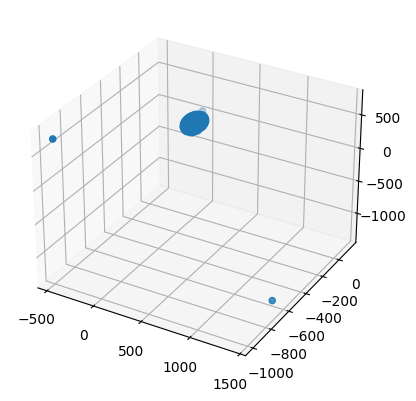

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2])

In [71]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=10).fit(np.array(df['embeddings'].tolist()))

: 